## Obtener datos

In [ ]:
# Importamos librerías 

import re # para aplicar expresiones regulares
import requests # para hacer solicitudes http

In [ ]:
# Creamos una variable con la url

url_1 = 'https://centralelectoral.ine.mx/2024/04/08/version-estenografica-del-primer-debate-entre-las-candidaturas-a-la-presidencia-de-la-republica-del-proceso-electoral-federal-2023-2024-la-sociedad-que-queremos/'
url_2 = 'https://centralelectoral.ine.mx/2024/04/29/version-estenografica-del-segundo-debate-presidencial-federal-2023-2024/'
url_3 = 'https://centralelectoral.ine.mx/2024/05/20/version-estenografica-del-tercer-debate-entre-las-candidaturas-a-la-presidencia-de-la-republica-del-proceso-electoral-federal-2023-2024/'

In [ ]:
# Hacemos la solicitud a la página

res_1 = requests.get(url_1)
res_2 = requests.get(url_2)
res_3 = requests.get(url_3)

# Convertimos el resultado a texto

html_1 = res_1.text
html_2 = res_2.text
html_3 = res_3.text

In [ ]:
# Creamos una expresión regular para extraer lo que necesitamos

patron = r'<p>(.*?)</p>'

In [ ]:
# Creamos una expresión regular para filtrar cada candidato

expresion_m = r'<strong>Candidato a la Presidencia del Partido Movimiento Ciudadano, Jorge Álvarez Máynez\s*(.*?)\s*<strong>'
expresion_x = r'<strong>Candidata a la Presidencia por la Coalición “Fuerza y Corazón por México”, Bertha Xóchitl Gálvez Ruiz\s*(.*?)\s*<strong>'
expresion_c = r'<strong>Candidata a la Presidencia por la Coalición “Sigamos Haciendo Historia”, Claudia Sheinbaum Pardo\s*(.*?)\s*<strong>'

In [ ]:
# Definimos una función para buscar en nuestro texto con expresiones regulares

def filtrar_html(html,patron):

    # Buscamos las coincidencias con nuestra expresión regular 

    text_from_html = re.findall(patron,html,re.DOTALL) # Nos devuelve una lista

    # Eliminamos '<strong>:</strong>' para facilitar nuestra búsqueda

    text_from_html = (
        str(text_from_html) # Convertir la lista en una cadena
        .replace('<strong>:</strong>','') # Quitamos las etiquetas <strong>
    )

    return (text_from_html)

In [ ]:
# Creamos una función para limpiar los datos obtenidos

def filtrar_candidato(patron,texto):

    # Filtramos con la expresión del candito

    texto_raw = (
        re.findall(
            patron,
            texto,
            re.DOTALL
        )
    )

    # Reemplazamos los carácteres que nos dificultan nuestro análisis

    texto_raw = [texto.replace('&nbsp;', '') for texto in texto_raw]
    texto_raw = [texto.replace('</strong>', '').replace("'", '').replace(':','').replace('</a>','').replace('.','').replace(',','').replace(';','').replace('?','') for texto in texto_raw]
    texto_raw = list(filter(None, texto_raw))

    # Añadimos el texto a una cadena

    texto = ''.join(texto_raw)

    return texto

In [ ]:
# Filtramos por candidato y unimos las palabras de los tres debates

# Candidata Claudia S.

c_1 = filtrar_candidato(expresion_c,filtrar_html(html_1,patron))
c_2 = filtrar_candidato(expresion_c,filtrar_html(html_2,patron))
c_3 = filtrar_candidato(expresion_c,filtrar_html(html_3,patron))

c = c_1 + c_2 + c_3

# Candidato Maynez

m_1 = filtrar_candidato(expresion_m,filtrar_html(html_1,patron))
m_2 = filtrar_candidato(expresion_m,filtrar_html(html_2,patron))
m_3 = filtrar_candidato(expresion_m,filtrar_html(html_3,patron))

m = m_1 + m_2 + m_3

# Candidata Xochitl G.

x_1 = filtrar_candidato(expresion_x,filtrar_html(html_1,patron))
x_2 = filtrar_candidato(expresion_x,filtrar_html(html_2,patron))
x_3 = filtrar_candidato(expresion_x,filtrar_html(html_3,patron))

x = x_1 + x_2 + x_3

## Análisis de los datos obtenidos

In [ ]:
# ntlk es un modulo de procesamiento del lenguaje natural

import nltk
from nltk.tokenize import word_tokenize # https://www.nltk.org/howto/tokenize.html
from nltk.corpus import stopwords # https://www.nltk.org/howto/corpus.html
from nltk.probability import FreqDist # https://www.nltk.org/howto/probability.html

In [ ]:
# Descargamos la información necesaria

nltk.download('punkt') # Para tokenizar el texto 
nltk.download('stopwords') # Lista de palabras comunes

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Creamos con nltk un conjunto de palabras más comunes en español

palabras_comunes = set(stopwords.words("spanish")) # Se puede usar para cualquier idioma

# Actualizamos nuestro conjunto con palabras comunes

palabras_comunes.update(['vamos','tema','sistema','ser','tener','personas','hacer','vieja','mil','ahora','hablar','ver','si','va','voy','ciento','además','decir'])

In [ ]:
# Definimos una función para analizar la palabras durante los debates de cada candidato

def nla(texto_candidato, pc): # Los parámetros son el texto y las palabras comunes

    # Tokenizamos nuestra cadena
    
    tokens = word_tokenize(texto_candidato)

    # Usamos list comprehension para eliminar las palabras más comunes

    tokens = [palabra for palabra in tokens if palabra.lower() not in pc]

    # Obtenemos la frecuencia de las palabras que más se repiten

    frecuencia = FreqDist(tokens)

    # Devolvemos el top 10 de palabras más repetidas para cada candidato

    return frecuencia.most_common(10)

In [ ]:
# Aplicamos nuestra función para la candidata Xochitl

x_res = nla(x,palabras_comunes)
x_res

[('México', 65),
 ('gobierno', 43),
 ('dinero', 34),
 ('millones', 31),
 ('candidata', 31),
 ('Claudia', 28),
 ('mujeres', 27),
 ('mentiras', 27),
 ('país', 25),
 ('Morena', 25)]

In [ ]:
# Aplicamos nuestra función para la candidata Claudia

c_res = nla(c,palabras_comunes)

In [ ]:
# Aplicamos nuestra función para el candidato Maynez

m_res = nla(m,palabras_comunes)

## Visualización de resultados

In [ ]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Definimos parámetros comunes de nuestros gráficos

sns.set_style(style='darkgrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (16, 9)

### Resultado Xochitl Galvez

/tmp/ipykernel_1076/2951201319.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1076/2951201319.py:11: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


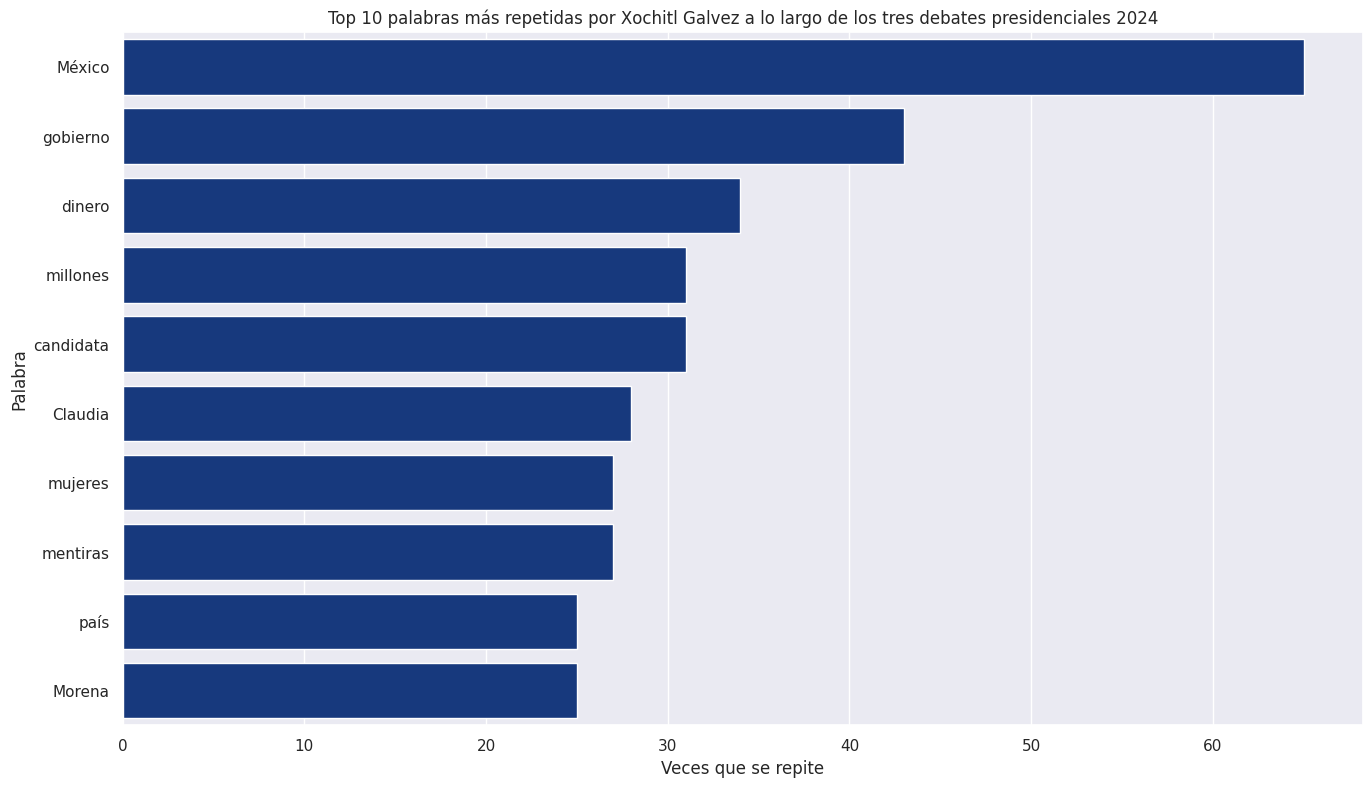

In [ ]:
# Volvemos un pequeño df los resultado obtenidos en el análisis

df_x = pd.DataFrame(x_res, columns=['Palabra','Veces que se repite'])

colores_pan = ['#06338e'] # Azul PAN


# Creamos un gráfico de barras

(
    sns.barplot(
        data=df_x,
        x='Veces que se repite',
        y='Palabra',
        palette=colores_pan
    )
)

plt.title('Top 10 palabras más repetidas por Xochitl Galvez a lo largo de los tres debates presidenciales 2024')
plt.show()

### Resultado Claudia Sheinbaum

/tmp/ipykernel_1076/167285962.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1076/167285962.py:11: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


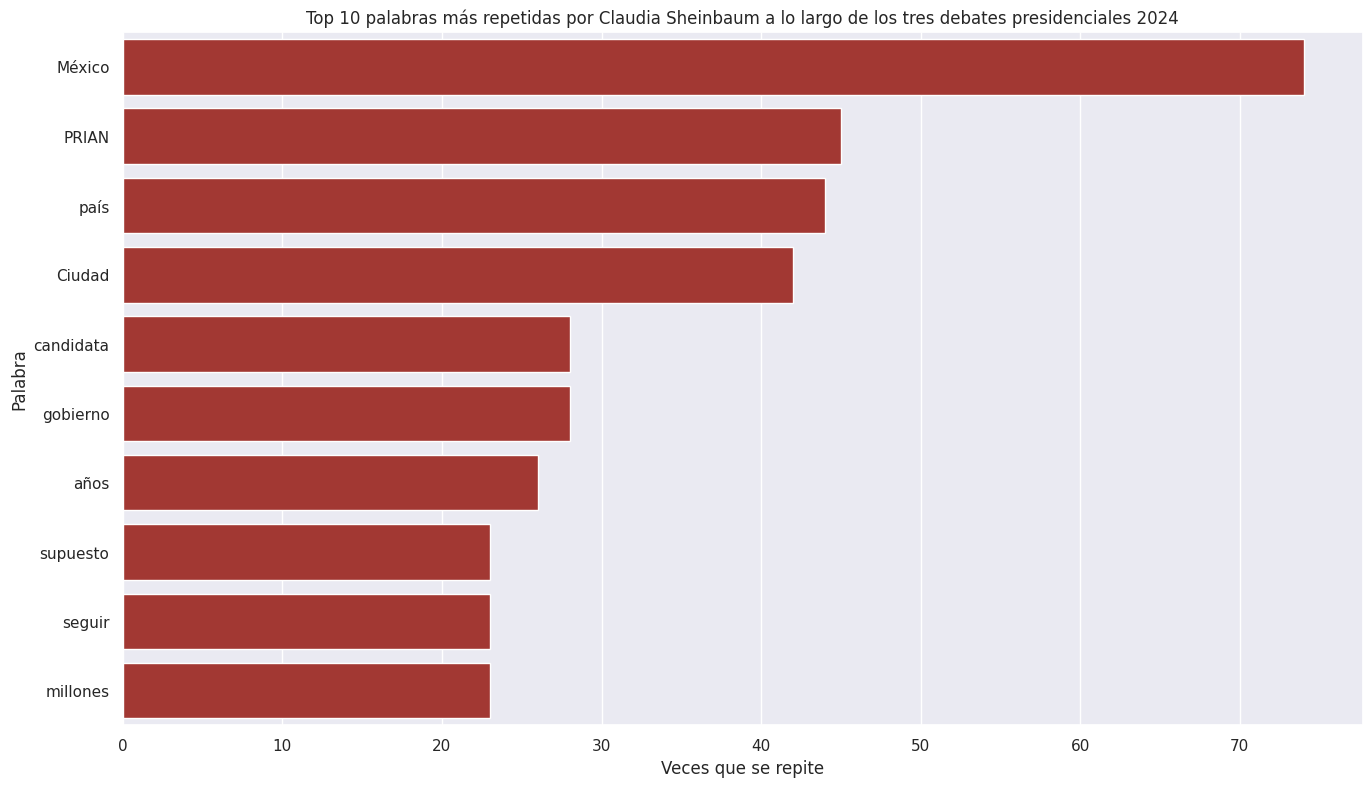

In [ ]:
# Volvemos un pequeño df los resultado obtenidos en el análisis

df_c = pd.DataFrame(c_res, columns=['Palabra','Veces que se repite'])

colores_morena = ['#b42721'] # Color vino Morena


# Creamos un gráfico de barras

(
    sns.barplot(
        data=df_c,
        x='Veces que se repite',
        y='Palabra',
        palette=colores_morena
    )
)

plt.title('Top 10 palabras más repetidas por Claudia Sheinbaum a lo largo de los tres debates presidenciales 2024')
plt.show()

### Resultado Jorge Maynez

/tmp/ipykernel_1076/1069605340.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1076/1069605340.py:9: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


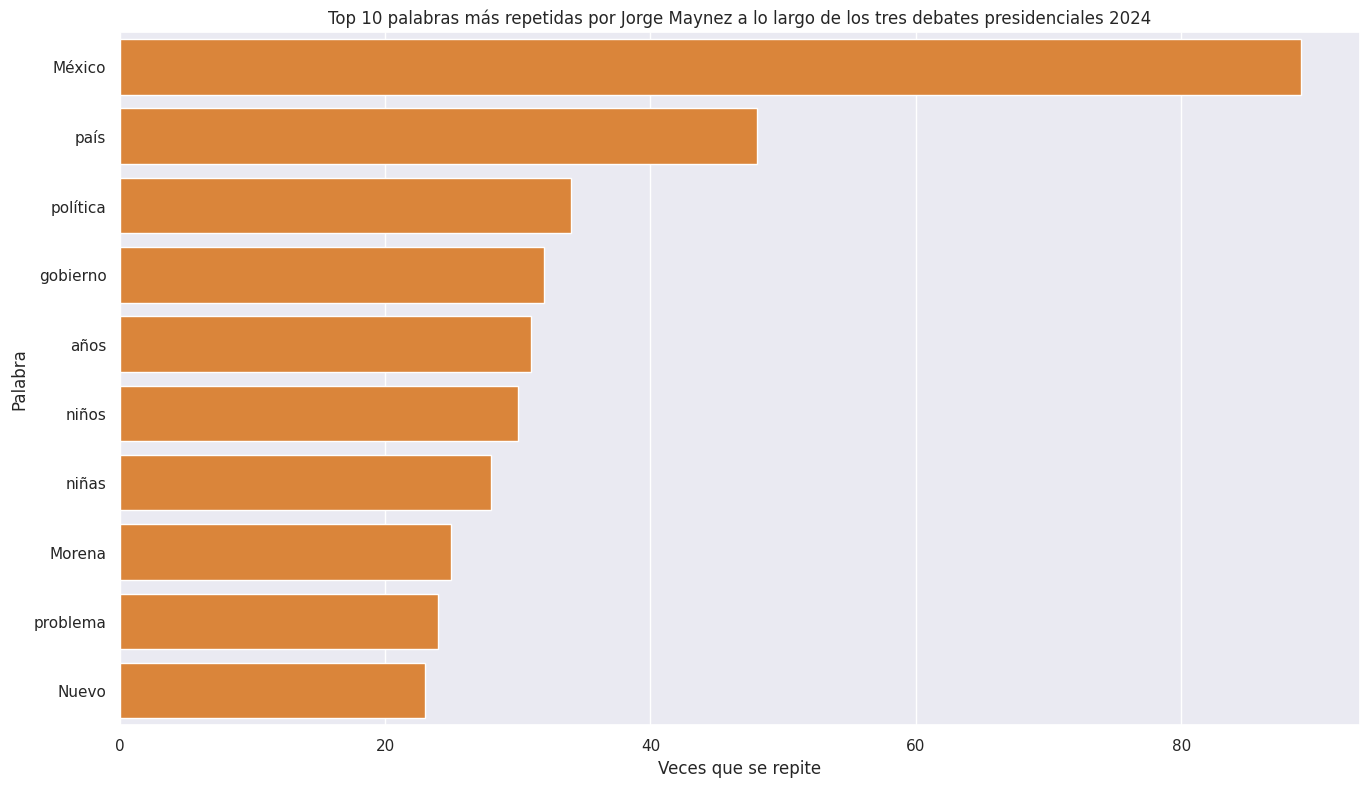

In [ ]:
df_m = pd.DataFrame(m_res, columns=['Palabra','Veces que se repite'])

colores_mc = ['#f5831f'] # Naranja MC


# Creamos un gráfico de barras

(
    sns.barplot(
        data=df_m,
        x='Veces que se repite',
        y='Palabra',
        palette=colores_mc
    )
)

plt.title('Top 10 palabras más repetidas por Jorge Maynez a lo largo de los tres debates presidenciales 2024')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a7ca8bc7-fe77-4f20-be19-397d3742c879' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>